**Import libraries**

In [ ]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

**Load dataset**

In [ ]:
path=[]
labels=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded')


Dataset is loaded


In [ ]:
path[:5]

[]

In [ ]:
labels[:5]

[]

**Create a Data frame**

In [ ]:
df = pd.DataFrame()
df['speech'] = path
df['label'] = labels
df.head()

,speech,label


In [ ]:
df['label'].value_counts()

Series([], Name: label, dtype: int64)

In [ ]:
df

,speech,label,speech_category


**Exploratory data anlysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # Add the import statement for numpy

# Assuming you have a DataFrame named 'df' and a column named 'speech'
# Extract the speech category from the file paths
df['speech_category'] = df['speech'].str.split('/').str[-2]
# Assuming you have a DataFrame named 'df' and a column named 'speech'
# Extract the speech category from the file paths using apply and lambda function
# df['speech_category'] = df['speech'].apply(lambda x: x.split('/')[-2] if isinstance(x, str) else None)


# Create a countplot for the extracted speech categories
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

sns.countplot(data=df, x='speech_category')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility

# Label your plot
plt.xlabel('Speech Categories')
plt.ylabel('Count')
plt.title('Distribution of Speech Categories')

plt.show()


AttributeError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' and a column named 'speech'
# Extract the speech category from the file paths
df['speech_category'] = df['speech'].str.split('/').str[-2]

# Create a countplot for the extracted speech categories
sns.set(style="lightgrid")
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

sns.countplot(data=df, x='speech_category')
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better visibility

# Label your plot
plt.xlabel('Speech Categories')
plt.ylabel('Count')
plt.title('Distribution of Speech Categories')

plt.show()


AttributeError: ignored

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x= librosa.stft(data)
    xdb= librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

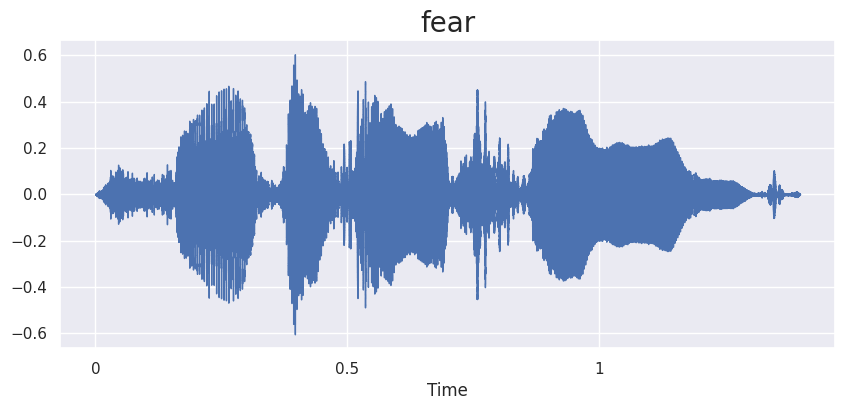

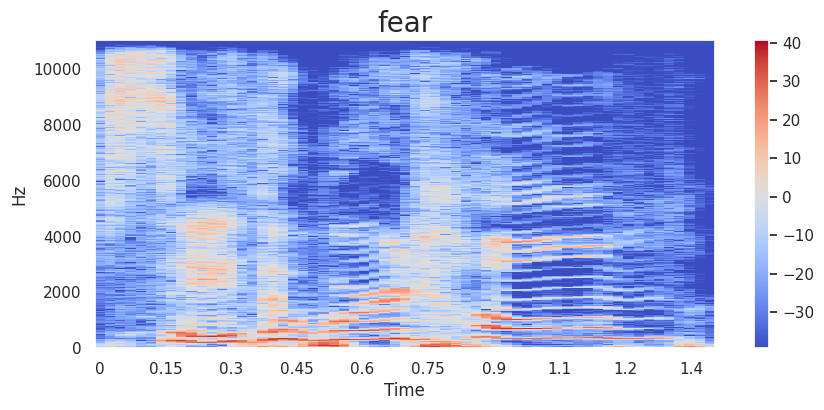

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

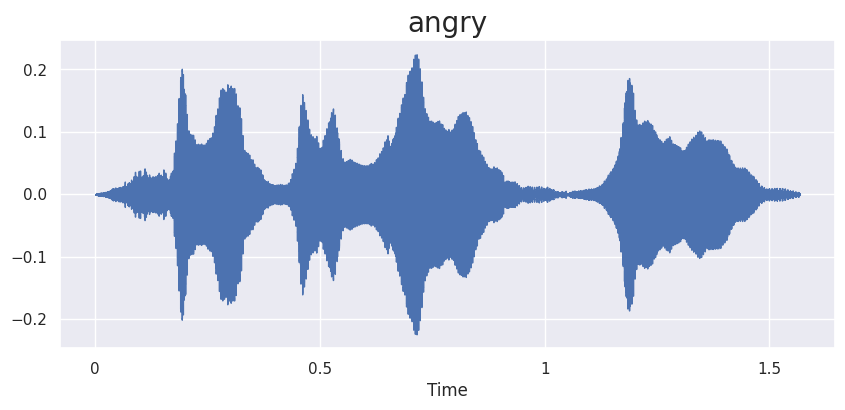

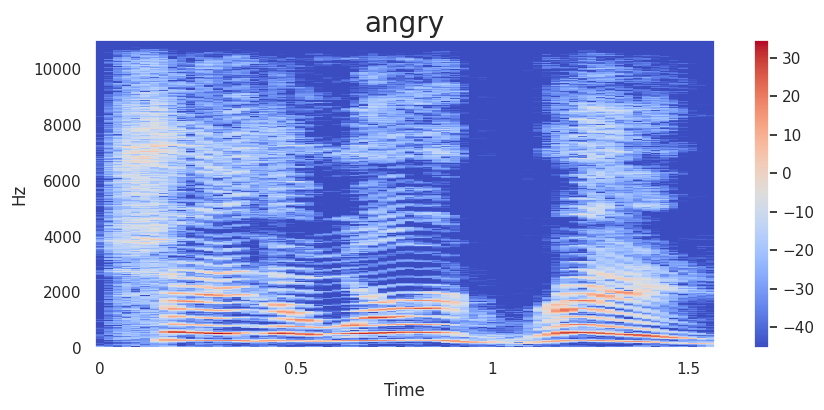

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

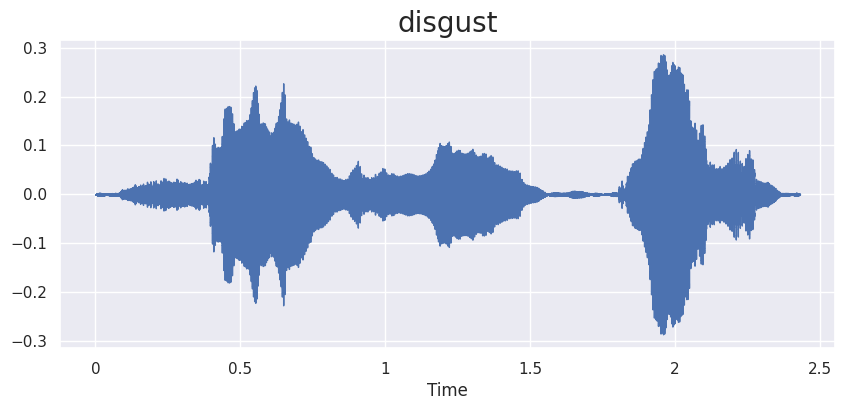

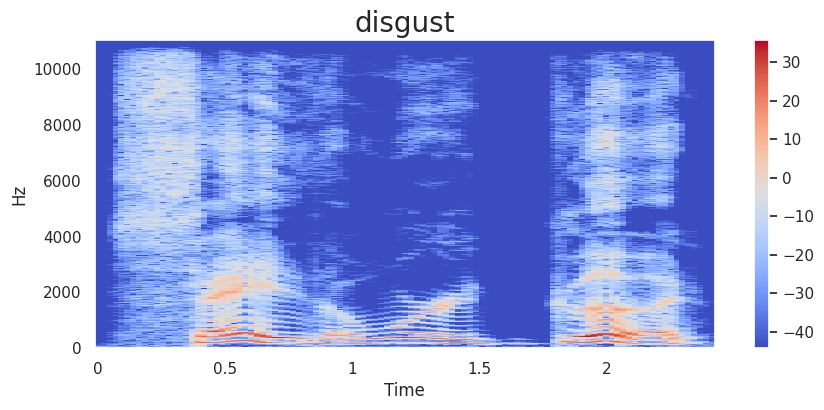

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

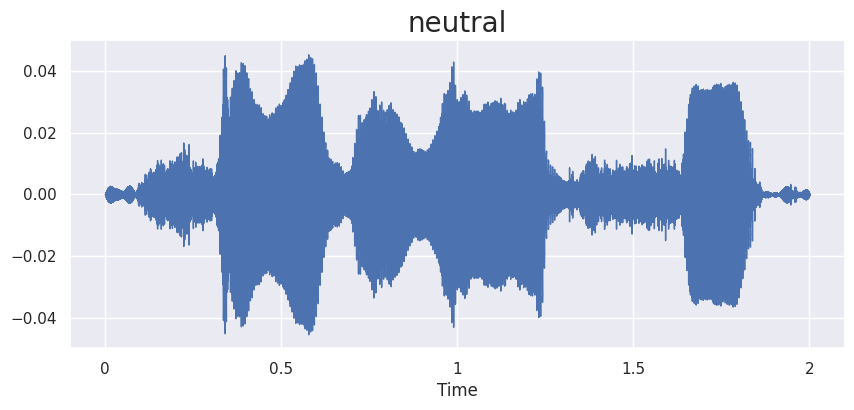

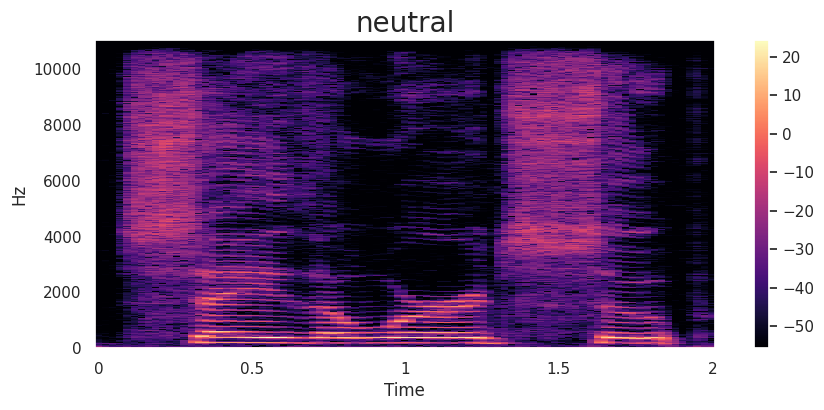

In [ ]:
emotion = 'neutral'
path =np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

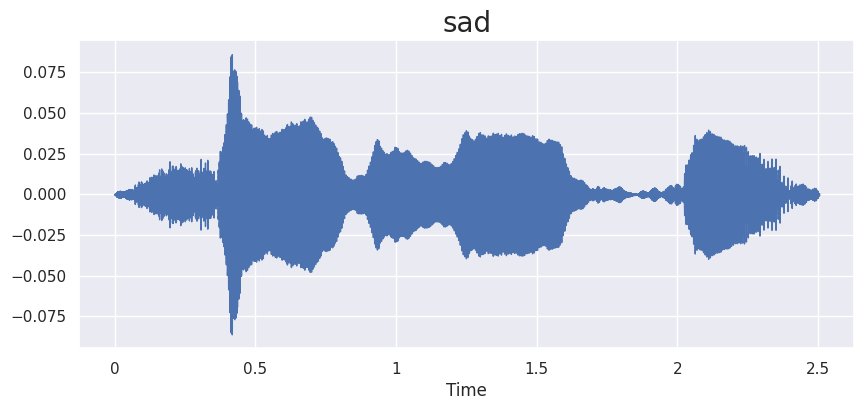

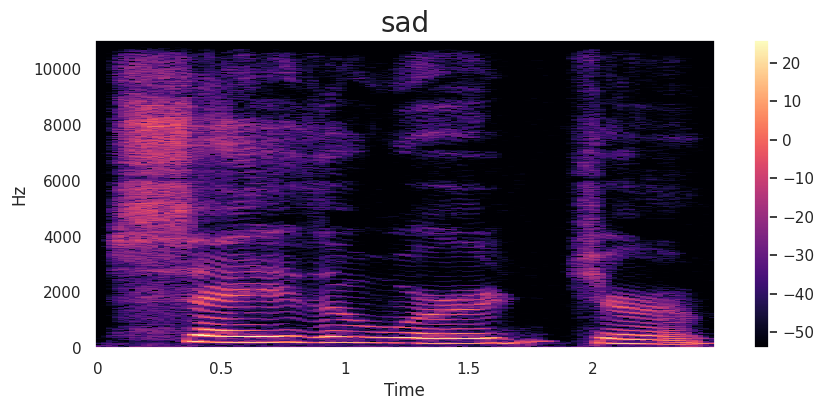

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

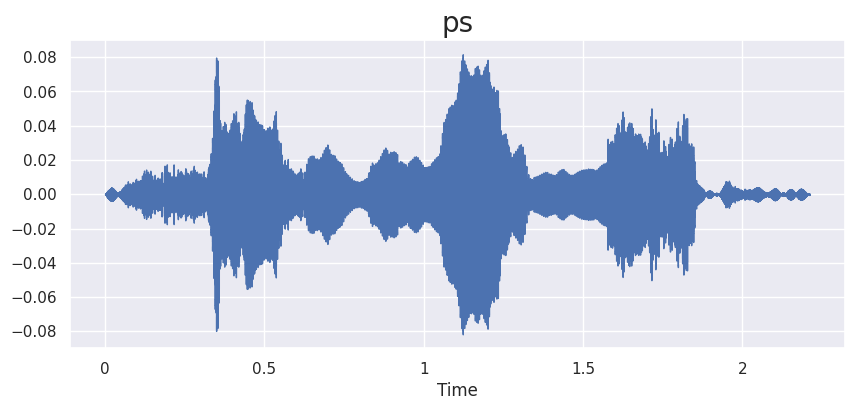

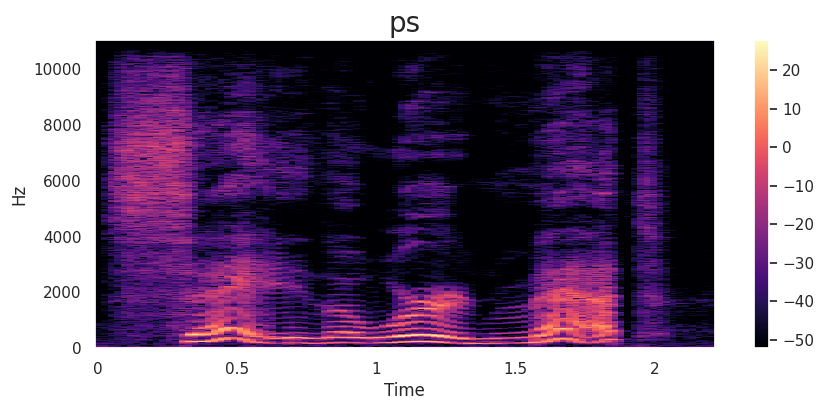

In [ ]:
emotion = 'ps'
path =np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

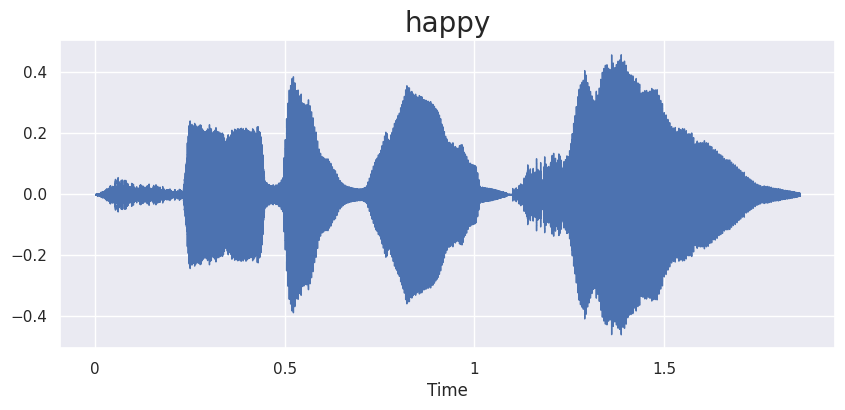

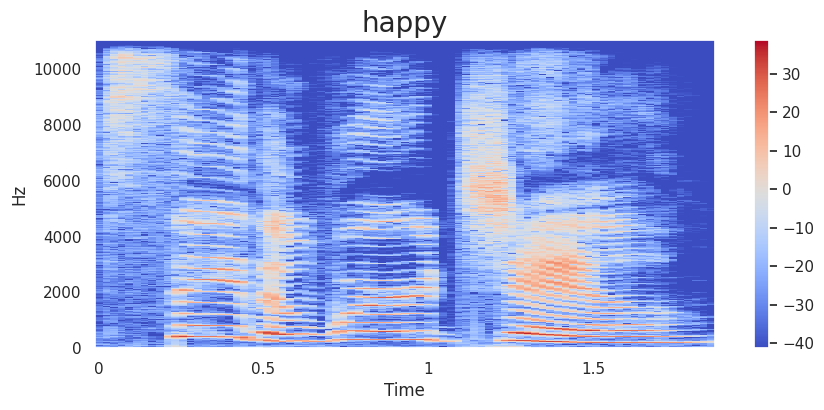

In [ ]:
emotion = 'happy'
path =np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate =librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)

**Feature Extraction**

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [ ]:
X_mfcc= df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 5600, dtype: object

In [ ]:
X=[x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [ ]:
# input spilit
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(5600, 7)

**Create the LSTM MODEL**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 123)               61500     
                                                                 
 dense_3 (Dense)             (None, 64)                7936      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

In [ ]:
#Train the model
history = model.fit(X,y,validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 [==============================] - 7s 73ms/step - loss: 1.7797 - accuracy: 0.3971 - val_loss: 1.8630 - val_accuracy: 0.1071
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 1.3714 - accuracy: 0.6025 - val_loss: 1.7423 - val_accuracy: 0.1161
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 0.9436 - accuracy: 0.6781 - val_loss: 1.4734 - val_accuracy: 0.2688
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.7101 - accuracy: 0.7513 - val_loss: 1.1127 - val_accuracy: 0.4652
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5605 - accuracy: 0.7955 - val_loss: 0.9059 - val_accuracy: 0.5688
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.4656 - accuracy: 0.8333 - val_loss: 0.7293 - val_accuracy: 0.6875
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.3845 - accuracy: 0.8667 - val_loss: 0.5869 - val_accuracy: 0.7723
Epoch 8/100
9/9 [===

**plot the results**

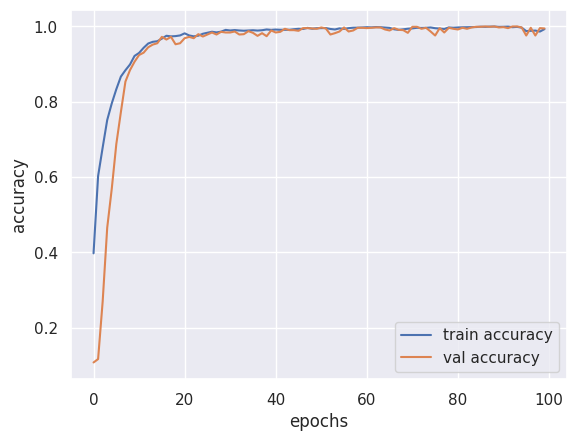

In [ ]:
epochs = range(100)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

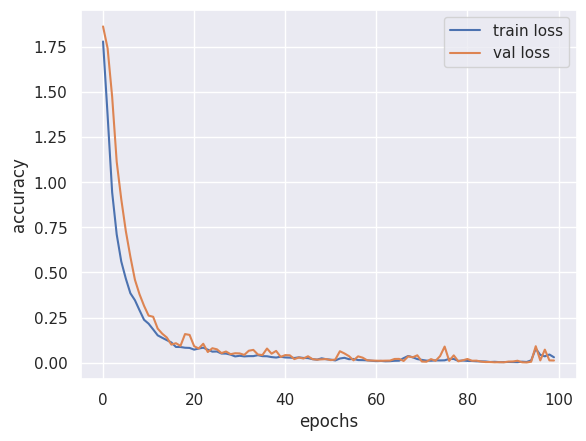

In [ ]:
epochs = range(100)
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()